In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
gray_img = cv2.imread("/content/unequalized.jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
img = cv2.imread("data/struk6.jpg")

In [4]:
img.shape

(2014, 1090, 3)

In [8]:
img

array([[[228, 231, 229],
        [221, 224, 222],
        [217, 221, 216],
        ...,
        [155, 155, 155],
        [158, 159, 157],
        [123, 124, 122]],

       [[227, 230, 228],
        [219, 222, 220],
        [214, 218, 213],
        ...,
        [155, 155, 155],
        [159, 160, 158],
        [124, 125, 123]],

       [[227, 230, 228],
        [219, 222, 220],
        [214, 218, 213],
        ...,
        [156, 156, 156],
        [162, 163, 161],
        [127, 128, 126]],

       ...,

       [[ 65,  71,  82],
        [118, 124, 135],
        [147, 156, 166],
        ...,
        [117, 125, 142],
        [120, 128, 145],
        [120, 128, 145]],

       [[ 63,  69,  80],
        [120, 126, 137],
        [145, 154, 164],
        ...,
        [117, 125, 142],
        [119, 127, 144],
        [119, 127, 144]],

       [[ 60,  66,  77],
        [121, 127, 138],
        [143, 152, 162],
        ...,
        [117, 125, 142],
        [119, 127, 144],
        [118, 126, 143]]

In [6]:
show(img[:,:,2])

NameError: name 'show' is not defined

In [9]:
(B, G, R) = cv2.split(img)
show(G)

NameError: name 'show' is not defined

In [10]:
gray_img.max()

255

In [11]:
#Mencari nilai c
c = 255/(math.log(1 + gray_img.max()))
print(c)

45.98590442833571


In [12]:
gray_img.shape

(2014, 1090)

In [13]:
output_img = np.zeros(gray_img.shape)
for x, y in np.ndindex(gray_img.shape):
  output_img[x,y] = c * math.log(1 + gray_img[x,y])

In [14]:
from google.colab.patches import cv2_imshow as show

(gray_img)

ModuleNotFoundError: No module named 'google.colab'

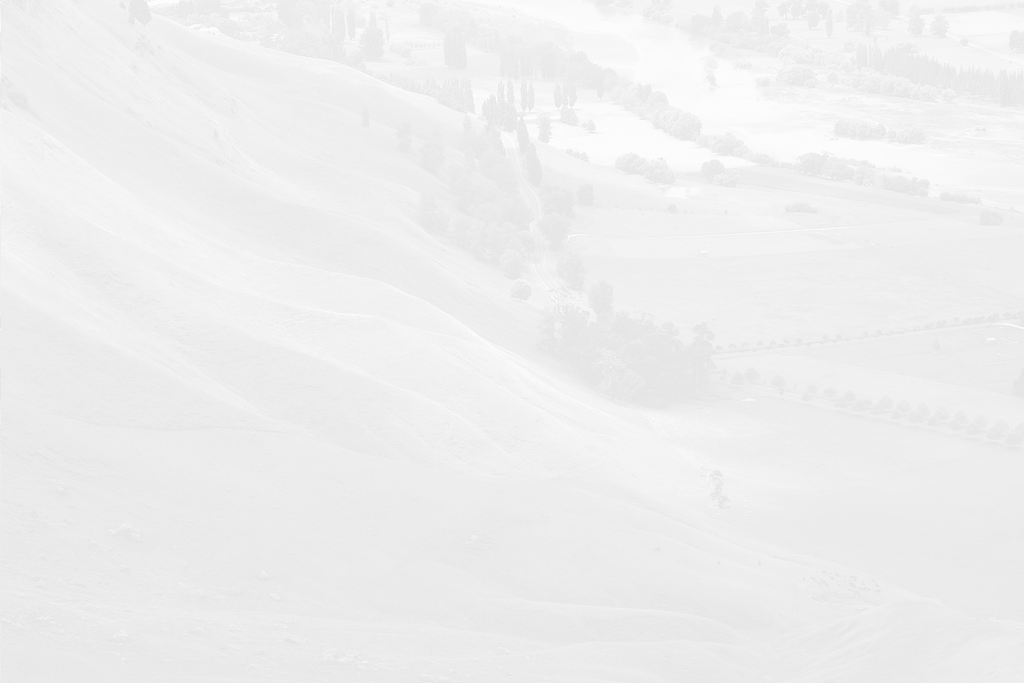

In [ ]:
show(output_img)

---

In [1]:
# Power Law (Gamma) Transformation

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
gray_img = cv2.imread("gambarku.jpg", cv2.IMREAD_GRAYSCALE)

In [8]:
# Tentukan nilai Gamma

gamma = 5

In [9]:
output_gamma = np.zeros(gray_img.shape)

In [10]:
for x, y in np.ndindex(gray_img.shape):
  output_gamma[x,y] = ((gray_img[x,y] / 255)**(1/gamma)) * 255

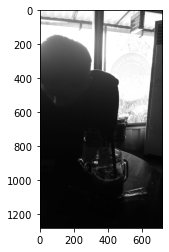

In [11]:
plt.imshow(gray_img, cmap="gray")

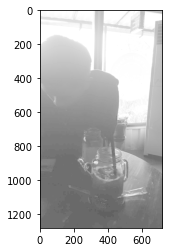

In [12]:
plt.imshow(output_gamma, cmap="gray")

---

In [ ]:
#Histogram Equalization

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [21]:
gray_img = cv2.imread("gambar rendah kedua.png", cv2.IMREAD_GRAYSCALE)

In [22]:
gray_img.shape

(385, 388)

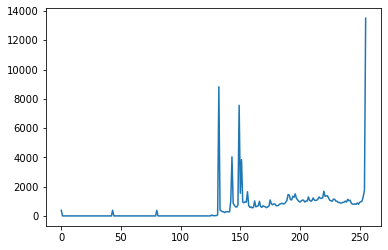

In [23]:
histo = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(histo)
plt.show()

In [24]:
# Cari nilai K
k = int(gray_img.max()).bit_length()
print(gray_img.max())
print(k)

255
8


In [25]:
# Mendapatkan nilai unique dan frekuensi 

(unique, counts) = np.unique(gray_img, return_counts=True)

In [26]:
len(unique)

134

In [27]:
print(unique)

[  0  43  80  86 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255]


In [28]:
print(counts)

[  384   388   382     1    61    14    24    15    24    71  8823   394
   349   288   276   228   288   291   283   283  1042  4033   860   723
   619   610   754  7556  1550  3847   950   902   973   941  1653   719
   580   622   546   586  1024   623   653   692   996   645   584   691
   647   622   563   620   668  1090   819   761   822   816   697   691
   733   802   834   861   820   836   931  1055  1459  1423  1113  1096
  1343  1272  1508  1200  1097   994   950  1016  1088  1068   946  1021
  1011  1298  1074  1003  1057  1228  1084  1053  1072  1152  1294  1203
  1198  1238  1685  1333  1367  1371  1223  1062  1029  1004  1144  1139
  1010  1006   912   920   882   883   929   943  1014   946  1134  1039
  1071   860   806   794   822   797   880   795   933   959  1017  1324
  1756 13503]


In [29]:
# Hitung distribusi kumulatif

cdx = np.zeros(len(counts))

cdx[0] = counts[0]

for i in range(1, len(counts)):
  cdx[i] = cdx[i-1] + counts[i]

print(cdx)

[   384.    772.   1154.   1155.   1216.   1230.   1254.   1269.   1293.
   1364.  10187.  10581.  10930.  11218.  11494.  11722.  12010.  12301.
  12584.  12867.  13909.  17942.  18802.  19525.  20144.  20754.  21508.
  29064.  30614.  34461.  35411.  36313.  37286.  38227.  39880.  40599.
  41179.  41801.  42347.  42933.  43957.  44580.  45233.  45925.  46921.
  47566.  48150.  48841.  49488.  50110.  50673.  51293.  51961.  53051.
  53870.  54631.  55453.  56269.  56966.  57657.  58390.  59192.  60026.
  60887.  61707.  62543.  63474.  64529.  65988.  67411.  68524.  69620.
  70963.  72235.  73743.  74943.  76040.  77034.  77984.  79000.  80088.
  81156.  82102.  83123.  84134.  85432.  86506.  87509.  88566.  89794.
  90878.  91931.  93003.  94155.  95449.  96652.  97850.  99088. 100773.
 102106. 103473. 104844. 106067. 107129. 108158. 109162. 110306. 111445.
 112455. 113461. 114373. 115293. 116175. 117058. 117987. 118930. 119944.
 120890. 122024. 123063. 124134. 124994. 125800. 12

In [30]:
(height,width) = gray_img.shape

In [31]:
#Menghitung nilai Ko

wh = height * width
dj = (2**k)-1

ko = np.zeros(len(counts))

for i in range(0, len(counts)):
  ko[i] = round((cdx[i]*dj)/wh)
  
print(ko)

[  1.   1.   2.   2.   2.   2.   2.   2.   2.   2.  17.  18.  19.  19.
  20.  20.  21.  21.  21.  22.  24.  31.  32.  33.  34.  35.  37.  50.
  52.  59.  60.  62.  64.  65.  68.  69.  70.  71.  72.  73.  75.  76.
  77.  78.  80.  81.  82.  83.  84.  86.  87.  88.  89.  91.  92.  93.
  95.  96.  97.  98. 100. 101. 102. 104. 105. 107. 108. 110. 113. 115.
 117. 119. 121. 123. 126. 128. 130. 132. 133. 135. 137. 139. 140. 142.
 144. 146. 148. 149. 151. 153. 155. 157. 159. 161. 163. 165. 167. 169.
 172. 174. 177. 179. 181. 183. 185. 186. 188. 190. 192. 194. 195. 197.
 198. 200. 201. 203. 205. 206. 208. 210. 212. 213. 215. 216. 218. 219.
 220. 222. 223. 225. 227. 229. 232. 255.]


In [32]:
# Replace element image

output = np.zeros(gray_img.shape)

for x,y in np.ndindex(gray_img.shape):
  output[x,y] = ko[int(np.where(unique == gray_img[x,y])[0])]

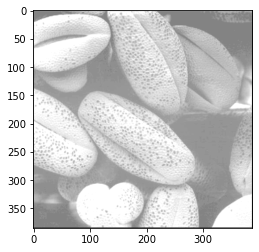

In [33]:
# from google.colab.patches import cv2_imshow as show
plt.imshow(gray_img, cmap="gray")

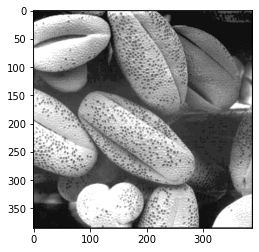

In [34]:
plt.imshow(output, cmap="gray")

In [35]:
import seaborn as sns

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

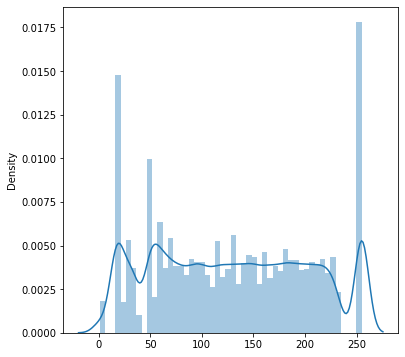

In [36]:
figure = plt.figure(figsize=(6,6))
sns.distplot(output)


C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

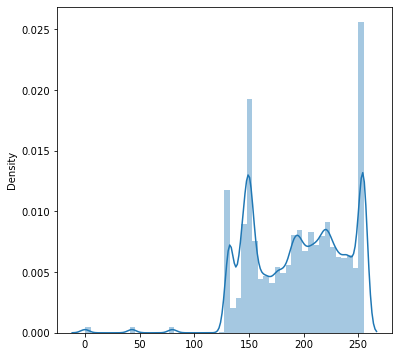

In [37]:
figure = plt.figure(figsize=(6,6))
sns.distplot(gray_img)

---

In [121]:
gray_baru = gray_img.flatten()
add = cv2.add(gray_baru,80)

In [122]:
gray_baru.max()

255

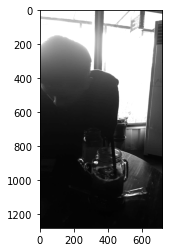

In [123]:
plt.imshow(add.reshape(1280, 720), cmap="gray")

C:\Users\Rahmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

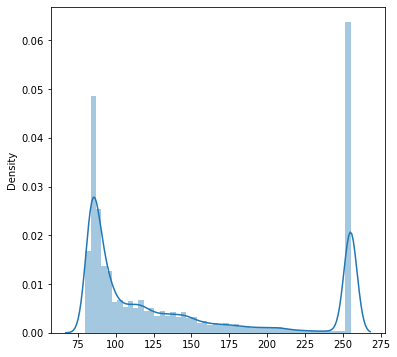

In [124]:
figure = plt.figure(figsize=(6,6))
sns.distplot(add)